# Gradient Descent: An Example
## Wine Quality Prediction

![Fig.1](wine_quality.jpg "Wine Quality")

### Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. 
These datasets can be viewed as classification or regression tasks.
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

#### Input features (based on physicochemical tests):
1 - fixed acidity.
2 - volatile acidity.
3 - citric acid.
4 - residual sugar.
5 - chlorides.
6 - free sulfur dioxide.
7 - total sulfur dioxide.
8 - density.
9 - pH.
10 - sulphates.
11 - alcohol.

#### Output variable (based on sensory data):
12 - quality (score between 0 and 10)


In [1]:
import pandas as pd
import numpy as np

In [2]:
## (1) Data preparation
df=pd.read_csv('winequality-white.csv', sep = ';')
df
X = df.values[:, :11]
Y = df.values[:, 11]
print(X.shape, Y.shape)

# data normalization. rescale data
min_vals = np.min(X, axis = 0)
max_vals = np.max(X, axis = 0)
X1 = (X-min_vals)/(max_vals-min_vals)# --> 0 to 1
np.max(X1, axis = 0)

(4898, 11) (4898,)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [3]:
##(2) Assume a linear mode that y = w0*1 + w_1*x_1 +w_2*x_2+...+ w_11*x_11
def predict(x, w):
    '''
    x: input feature vector
    w: weights
    
    return y_hat
    '''
    
    y_hat = w[0] + np.dot(w[1:].T, np.c_[x]) # linear model
    
    return y_hat

#test
w = np.random.rand(12, 1) # random w
x = X1[0, :] # first sample

y_hat = predict(x, w)
print('y_hat:', y_hat, '\n', 'weights:', w)

y_hat: [[2.00111141]] 
 weights: [[0.8556156 ]
 [0.76293629]
 [0.11000545]
 [0.73832553]
 [0.14577048]
 [0.13324515]
 [0.02297844]
 [0.31304911]
 [0.65988156]
 [0.62101906]
 [0.75487557]
 [0.1078213 ]]


In [4]:
## (3) Loss function: L = 1/2 * sum(y_hat_i - y_i)^2
def loss(w, X, Y):
    '''
    w: weights
    X: input feature vector
    Y: targets
    '''
    m = len(Y)
    loss = 0
    for i in range(m):
        y_hat = predict(X[i, :], w)
        loss = loss + np.square(Y[i] - y_hat)
        #print(i, y_hat, Y[i], loss)
    loss = loss/2
    
    return loss

loss(w, X1, Y)

array([[38720.51325894]])

In [ ]:
#(4) Optimization: Gradient Descent
def GD(X, Y, init_w, lr = 0.001, delta = 0.01, max_iter = 100):
    '''GD
    parameters:
        init_w: w^0
        X: training data
        Y: training target
        lr: learning rate
        max_iter: the max iterations of the while loop
        delta: threshold for the stopping condition
    
    return:
        w_star: w*
        
    '''
    
    m = len(Y)
    b = np.reshape(Y, [Y.shape[0],1])
    w = init_w
    A = np.c_[np.ones((m, 1)), X]
    gradient = A.T.dot(np.dot(A, w)-b) # calculate the gradient
    
    loss_hist = np.zeros(max_iter)
    w_hist = np.zeros((max_iter, init_w.shape[0])) # recored the whole w sequence
    i = 0                  
    while(np.linalg.norm(gradient) > delta) and (i < max_iter):
        w_hist[i,:] = w.T
        loss_w = loss(w, X, Y) # calculate the loss
        print('iteration:', i, 'loss is: ', loss_w)
        loss_hist[i] = loss_w
        
        w = w - lr*gradient   # update weights      
        gradient = A.T.dot(np.dot(A, w)-b) # calculate the new grad at the new w
        i = i + 1
        
    w_star = w  
    return w_star, loss_hist, w_hist
        
init_w = np.random.rand(12, 1)
w_star, loss_hist, w_hist = GD(X1, Y, init_w, lr = 0.001, delta = 0.01, max_iter = 100)

iteration: 0 loss is:  [[44416.16896152]]
iteration: 1 loss is:  [[2451869.31848247]]
iteration: 2 loss is:  [[1.41585503e+08]]
iteration: 3 loss is:  [[8.18215097e+09]]
iteration: 4 loss is:  [[4.7284807e+11]]
iteration: 5 loss is:  [[2.73259862e+13]]
iteration: 6 loss is:  [[1.57917431e+15]]
iteration: 7 loss is:  [[9.12608048e+16]]
iteration: 8 loss is:  [[5.27398049e+18]]
iteration: 9 loss is:  [[3.04784407e+20]]


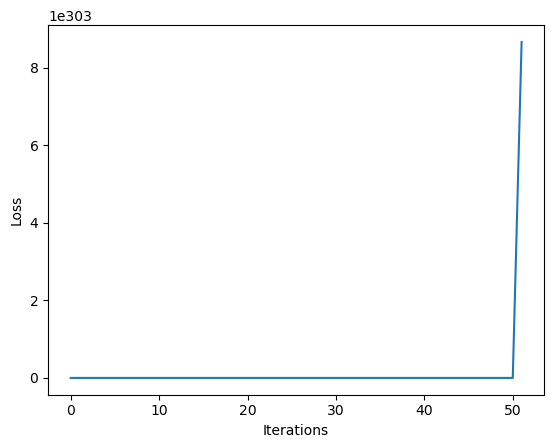

In [6]:
# show the Loss curve
from matplotlib import pyplot as plt
plt.plot(range(100), loss_hist)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [7]:
# Prediction
Y_hat = np.zeros((len(Y)))
for idx, x in enumerate(X1):
    Y_hat[idx] = predict(x, w_star)              
    
print(Y[:10], Y_hat[:10])

[6. 6. 6. 6. 6. 6. 6. 6. 6. 6.] [-1.02247095e+294 -1.07334884e+294 -1.10634789e+294 -1.09052693e+294
 -1.09052693e+294 -1.10634789e+294 -1.04122289e+294 -1.02247095e+294
 -1.07334884e+294 -1.13723736e+294]
